In [3]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [5]:
torch.__version__

'2.4.1'

## What we are going to cover

#### We will use the workflow to predict a simple straight line(Linear Regression)

##### 
1: "data (prepare and load)",
   
2: "build model",

3: "fitting the model to data (training)",

4: "making predictions and evaluating a model (inference)",

5: "saving and loading a model",

6: "putting it all together"

#### 1. Data(prepare and load)

#####
we will use linear regression to create the data with known parameters(things that can be learned by a model) and then we'll use pytorch to see if we can build model to estimate these parameters using gradient descent

In [125]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [127]:
X,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

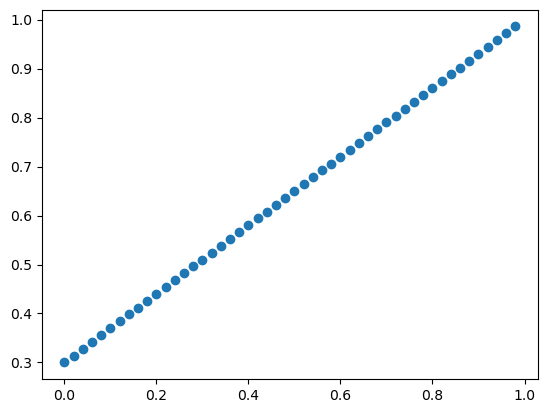

In [129]:
plt.scatter(X,y)

#### 1.1 Splitting the Data

In [142]:
# First of all, we will split the data into train, validation, and test data. This is the most important steps in machine learning.

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [144]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [146]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

    plt.figure(figsize = (10,7))

    plt.scatter(train_data, train_labels, c = "b", s= 4, label = "Training data")

    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r",s = 4, label = "Predictions")

    plt.legend(prop = {"size": 14})

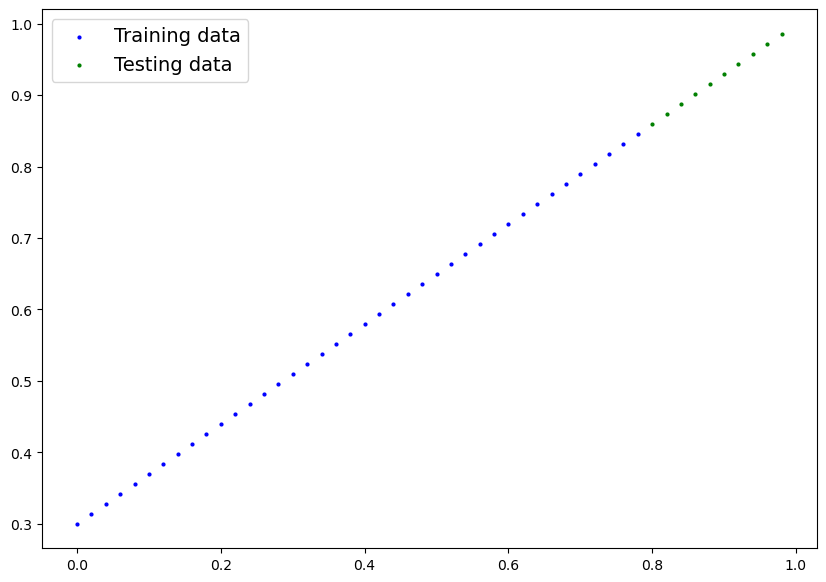

In [148]:
plot_predictions()

#### 2. Build model

In [153]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)

        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float),requires_grad = True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

##### 
Pytorch has four essential modules you can use to create almost any kind of neural network you can imagine. They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. For now, we will discuss only about first two. 

torch.nn: Contains all of the building blocks for computational graphs(essentially a series of computations executed in a                                         particular way)

torch.nn.Parameter: Stores tensors that can be used with nn.module. If requires_grad = True gradients(used for updating model                                               parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

torch.optim: Contains various optimization algorithms

df forward(): All nn.module subclasses require a forward() method, this defines the computation that will take place on the data                                      passed to the particular nn.module(e.g the linear regression formula above)

#### 2.1 Checking the contents of a pytorch model

In [155]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [157]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### 2.2 Making Predictions using torch.inference_mode()

In [163]:
with torch.inference_mode():
    y_preds = model_0(X_test)

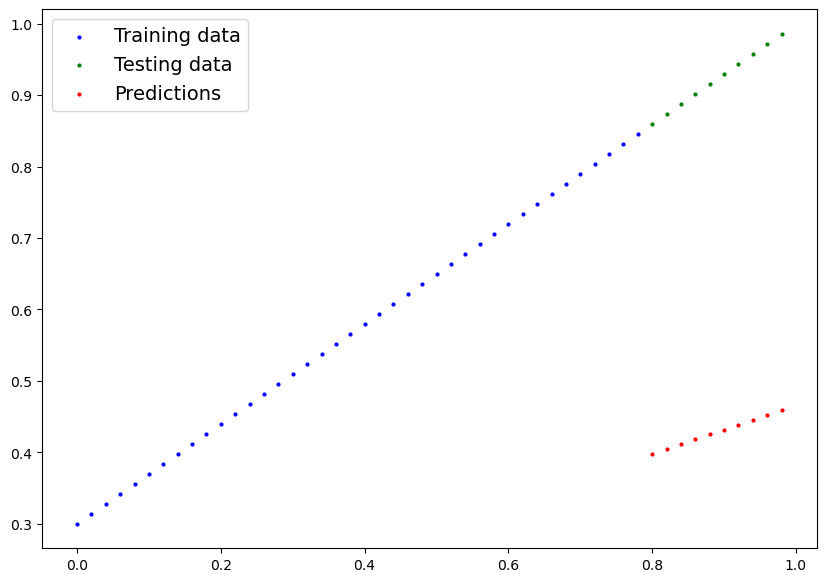

In [165]:
plot_predictions(predictions=y_preds)

#### 3. Train model

In [171]:
#Create the loss function
loss_fn = nn.L1Loss() #MAE loss is same as L1loss

#create an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [172]:
torch.manual_seed(42)

epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 10 | MAE Train loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
Epoch: 20 | MAE Train loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
Epoch: 30 | MAE Train loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
Epoch: 40 | MAE Train loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
Epoch: 50 | MAE Train loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
Epoch: 60 | MAE Train loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
Epoch: 70 | MAE Train loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
Epoch: 80 | MAE Train loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
Epoch: 90 | MAE Train loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819
Epoch: 100 | MAE Train loss: 0.024458957836031914 | MAE Test loss: 0.05646304413676262
Epoch: 110 | MAE Train loss: 0.021020207554101944 | MAE Test loss:

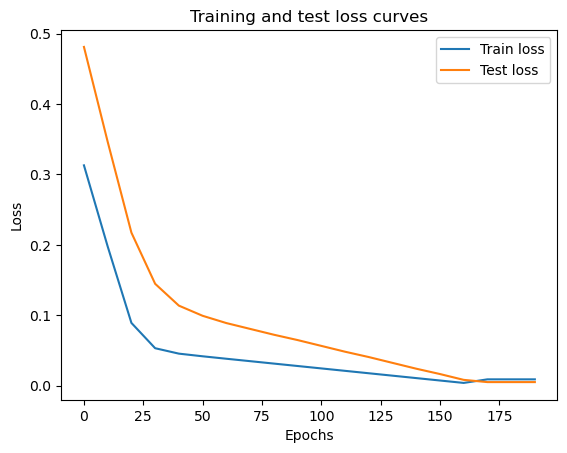

In [175]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [177]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


#### 4. Making Predictions with a trained model